In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score

#
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense


from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasRegressor
from sklearn.ensemble import AdaBoostRegressor

import pickle

# Load prepared data

In [2]:
dir_path = "/Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/"
# dir_path = "/Users/mriworkshop/Documents/TDCS/code/tdcs_thesis/"
save_path = dir_path+"data/raw/"
img_path =  dir_path+"data/processed/"
model_path = dir_path+"models/"

## fmap mean all experiments

In [3]:
file_mean = save_path+"fmap_mean_erode.txt"
columns_mean =['exp', 'mini_exp', 'i', 'j', 'k', 'mean0', 'mean1', 'mean2', 'mean3', 'mean4', 'theory']
data = np.loadtxt(file_mean);

In [4]:
df = pd.DataFrame(data, columns=columns_mean)
df = df.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int})
df

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory
0,36,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,36,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,36,1,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0
3,36,1,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0
4,36,1,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5046267,35,5,43,63,59,0.0,0.0,0.0,0.0,0.0,0.0
5046268,35,5,43,63,60,0.0,0.0,0.0,0.0,0.0,0.0
5046269,35,5,43,63,61,0.0,0.0,0.0,0.0,0.0,0.0
5046270,35,5,43,63,62,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5046272 entries, 0 to 5046271
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   exp       int64  
 1   mini_exp  int64  
 2   i         int64  
 3   j         int64  
 4   k         int64  
 5   mean0     float64
 6   mean1     float64
 7   mean2     float64
 8   mean3     float64
 9   mean4     float64
 10  theory    float64
dtypes: float64(6), int64(5)
memory usage: 423.5 MB


# Split data

## Data 1. fmap mean all experiments

In [6]:
df1_train = df[~((df['exp']==36) & ((df['mini_exp']==5) | (df['mini_exp']==6)))]
df1_val =  df[(df['exp']==36) & (df['mini_exp']==5)]
df1_test =  df[(df['exp']==36) & (df['mini_exp']==6)]

In [7]:
print(df1_train.shape)
print(df1_val.shape)
print(df1_test.shape)

(4685824, 11)
(180224, 11)
(180224, 11)


In [8]:
X1_train = df1_train.iloc[:, 5:-1].values 
y1_train = df1_train['theory'].values

X1_test = df1_val.iloc[:, 5:-1].values 
y1_test = df1_val['theory'].values

X1_pred = df1_test.iloc[:, 5:-1].values 
y1_pred = df1_val['theory'].values

In [9]:
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)
print(X1_pred.shape)
print(y1_pred.shape)

(4685824, 5)
(4685824,)
(180224, 5)
(180224,)
(180224, 5)
(180224,)


## Data2: One experiment

In [40]:
df_train = df[(df['exp']==36) & (df['mini_exp']!=6)]
df_test = df[(df['exp']==36) & (df['mini_exp']==6)]

## Data4: None zero

In [41]:
df_nonzero = df[(df['mean0']!=0.0) & (df['mean1']!=0.0) & (df['mean2']!=0.0) & (df['mean3']!=0.0) & (df['mean4']!=0.0)]

In [42]:
df_nonzero

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory
34920,36,1,8,33,40,17.758072,3.100749,-27.108955,-54.541569,-65.580933,6.323732
34921,36,1,8,33,41,-171.797119,-187.157349,-216.839035,-243.115356,-255.319305,5.692159
34922,36,1,8,33,42,-384.395447,-400.023895,-428.779266,-454.553436,-467.434479,5.156662
34923,36,1,8,33,43,-597.038513,-613.454895,-641.396118,-666.766907,-679.730591,4.694756
34959,36,1,8,34,15,-1179.840454,-1197.678955,-1222.885254,-1246.201660,-1258.513672,3.883065
...,...,...,...,...,...,...,...,...,...,...,...
5003809,35,5,33,40,33,-233.451859,-219.373581,-219.398911,-222.292938,-216.633850,20.445215
5003810,35,5,33,40,34,-249.901581,-236.660583,-236.275848,-238.081451,-233.357391,15.309294
5003811,35,5,33,40,35,-230.639755,-218.042419,-217.110458,-218.660629,-214.294983,12.231406
5003812,35,5,33,40,36,-186.973434,-174.493347,-173.302063,-174.678192,-170.903381,10.196120


In [43]:
df4_train = df_nonzero[~((df_nonzero['exp']==36) & ((df_nonzero['mini_exp']==6) | (df_nonzero['mini_exp']==5)))]
df4_test =  df_nonzero[(df_nonzero['exp']==36) & (df_nonzero['mini_exp']==5)]
df4_pred =  df_nonzero[(df_nonzero['exp']==36) & (df_nonzero['mini_exp']==6)]

In [44]:
X4_train = df4_train.iloc[:, 5:-1].values
y4_train = df4_train['theory'].values

X4_test = df4_test.iloc[:, 5:-1].values
y4_test = df4_test['theory'].values

X4_pred = df4_pred.iloc[:, 5:-1].values
y4_pred = df4_pred['theory'].values

In [25]:
# X = df_nonzero.iloc[:, 5:-1].values
# y = df_nonzero['theory'].values

# X4_train, X4_test, y4_train, y4_test = train_test_split(
#     X, y, test_size=0.3, random_state=0)

In [45]:
# print(X.shape)
# print(y.shape)
print(X4_train.shape)
print(y4_train.shape)
print(X4_test.shape)
print(y4_test.shape)
print(X4_pred.shape)
print(y4_pred.shape)

(694168, 5)
(694168,)
(27092, 5)
(27092,)
(27093, 5)
(27093,)


# Include zero 32 to 38

In [10]:
X_train = X1_train
y_train = y1_train
X_test = X1_test
y_test = y1_test

In [11]:
shape = (len(X_train[0]),)
model = keras.Sequential()
model.add(Dense(7, activation='relu', input_shape=shape)) 
model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='RMSprop', loss='mse', metrics=["mean_absolute_error"])

2022-12-11 15:26:45.334359: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [78]:
history = model.fit(X_train, y_train, epochs=100, batch_size=256, validation_data=[X_test, y_test])

Epoch 1/100
18304/18304 [==============================] - 25s 1ms/step - loss: 6.3162 - mean_absolute_error: 0.5695 - val_loss: 2.9272 - val_mean_absolute_error: 0.4882
Epoch 2/100
18304/18304 [==============================] - 24s 1ms/step - loss: 4.6128 - mean_absolute_error: 0.4872 - val_loss: 2.1374 - val_mean_absolute_error: 0.4095
Epoch 3/100
18304/18304 [==============================] - 24s 1ms/step - loss: 4.3219 - mean_absolute_error: 0.4646 - val_loss: 2.4087 - val_mean_absolute_error: 0.4113
Epoch 4/100
18304/18304 [==============================] - 23s 1ms/step - loss: 4.2663 - mean_absolute_error: 0.4621 - val_loss: 1.7181 - val_mean_absolute_error: 0.4085
Epoch 5/100
18304/18304 [==============================] - 23s 1ms/step - loss: 4.3146 - mean_absolute_error: 0.4647 - val_loss: 1.6382 - val_mean_absolute_error: 0.4110
Epoch 6/100
18304/18304 [==============================] - 23s 1ms/step - loss: 4.2310 - mean_absolute_error: 0.4778 - val_loss: 1.6481 - val_mean_abs

Epoch 49/100
18304/18304 [==============================] - 23s 1ms/step - loss: 4.7479 - mean_absolute_error: 0.4864 - val_loss: 3.3143 - val_mean_absolute_error: 0.5741
Epoch 50/100
18304/18304 [==============================] - 23s 1ms/step - loss: 4.0356 - mean_absolute_error: 0.4870 - val_loss: 1.4743 - val_mean_absolute_error: 0.4125
Epoch 51/100
18304/18304 [==============================] - 24s 1ms/step - loss: 4.4627 - mean_absolute_error: 0.4892 - val_loss: 1.9630 - val_mean_absolute_error: 0.4855
Epoch 52/100
18304/18304 [==============================] - 24s 1ms/step - loss: 4.1965 - mean_absolute_error: 0.4865 - val_loss: 2.1865 - val_mean_absolute_error: 0.3378
Epoch 53/100
18304/18304 [==============================] - 23s 1ms/step - loss: 3.9929 - mean_absolute_error: 0.4860 - val_loss: 2.9437 - val_mean_absolute_error: 0.3593
Epoch 54/100
18304/18304 [==============================] - 22s 1ms/step - loss: 4.2948 - mean_absolute_error: 0.4885 - val_loss: 1.4319 - val_me

Epoch 97/100
18304/18304 [==============================] - 23s 1ms/step - loss: 3.7580 - mean_absolute_error: 0.5243 - val_loss: 1.9196 - val_mean_absolute_error: 0.4000
Epoch 98/100
18304/18304 [==============================] - 26s 1ms/step - loss: 3.9688 - mean_absolute_error: 0.5404 - val_loss: 2.3870 - val_mean_absolute_error: 0.4167
Epoch 99/100
18304/18304 [==============================] - 23s 1ms/step - loss: 3.8498 - mean_absolute_error: 0.5236 - val_loss: 2.4352 - val_mean_absolute_error: 0.5197
Epoch 100/100
18304/18304 [==============================] - 26s 1ms/step - loss: 3.8465 - mean_absolute_error: 0.5183 - val_loss: 3.0720 - val_mean_absolute_error: 0.4336


In [14]:
train_pred = model.predict(X_train)
print(mse(train_pred, y_train))
print(mae(train_pred, y_train))
print(mape(train_pred, y_train))
test_pred = model.predict(X_test)
print(mse(test_pred, y_test))
print(mae(test_pred, y_test))
print(mape(test_pred, y_test))

146432/146432 [==============================] - 113s 769us/step
3.2354468354632684
0.4220178001932742
0.9637363904443507
5632/5632 [==============================] - 4s 772us/step
1.2306223508579905
0.35422272220935225
0.8838840037078277


In [80]:
model.evaluate(X_test, y_test)

5632/5632 [==============================] - 7s 1ms/step - loss: 3.0720 - mean_absolute_error: 0.4336


[3.0719833374023438, 0.433599591255188]

In [81]:
np.corrcoef(test_pred.flatten(), y_test)

array([[1.        , 0.95589515],
       [0.95589515, 1.        ]])

In [82]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 7)                 42        
                                                                 
 dense_11 (Dense)            (None, 7)                 56        
                                                                 
 dense_12 (Dense)            (None, 7)                 56        
                                                                 
 dense_13 (Dense)            (None, 7)                 56        
                                                                 
 dense_14 (Dense)            (None, 7)                 56        
                                                                 
 dense_15 (Dense)            (None, 1)                 8         
                                                                 
Total params: 274
Trainable params: 274
Non-trainable 

In [83]:
history.history

{'loss': [6.3162431716918945,
  4.6127543449401855,
  4.321878910064697,
  4.266347408294678,
  4.314621925354004,
  4.231019973754883,
  4.466618061065674,
  4.423377990722656,
  4.375506401062012,
  4.4896626472473145,
  4.219013690948486,
  4.161859512329102,
  4.162352561950684,
  4.284722805023193,
  4.476565361022949,
  4.159482479095459,
  4.337284564971924,
  4.206562042236328,
  4.182781219482422,
  4.238662242889404,
  4.221142768859863,
  4.165326118469238,
  4.099027156829834,
  3.9890716075897217,
  3.8981173038482666,
  3.960759162902832,
  3.9636127948760986,
  3.888415813446045,
  3.860468626022339,
  4.067134380340576,
  3.9409255981445312,
  4.276248455047607,
  4.293779373168945,
  4.9696173667907715,
  4.666830539703369,
  5.793573379516602,
  4.367753505706787,
  5.169429302215576,
  4.61297607421875,
  4.510715484619141,
  4.23966121673584,
  4.887499809265137,
  4.234283447265625,
  4.331377983093262,
  4.400248050689697,
  4.198935031890869,
  4.533234119415283,

In [84]:
file = img_path+'model_32to38_erode.sav'
pickle.dump(model, open(file, 'wb'))

INFO:tensorflow:Assets written to: ram:///var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/tmpz87k15kv/assets


In [12]:
file = model_path+'model_32to38_erode.sav'
model = pickle.load(open(file, 'rb'))
result = model.evaluate(X_test, y_test)
print(result)

5632/5632 [==============================] - 5s 853us/step - loss: 1.2306 - accuracy: 0.8495
[1.2306078672409058, 0.8495372533798218]


## Plot

### Loss function (MSE)

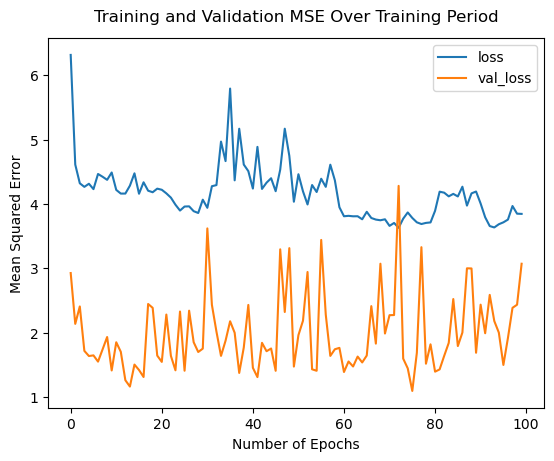

In [85]:
model_df = pd.DataFrame(history.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation MSE Over Training Period", pad=12);

### Accuracy

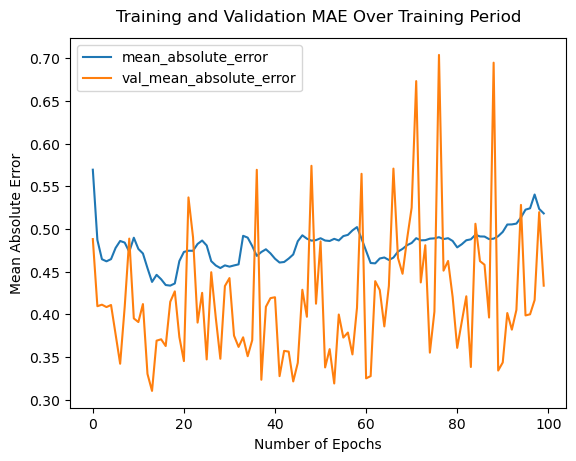

In [86]:
model_df[['mean_absolute_error', 'val_mean_absolute_error']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Absolute Error")
plt.title("Training and Validation MAE Over Training Period", pad=12);

### Theory vs Predict

r: 0.98033, st_er: 0.000460
y = 0.97*x + -0.0149


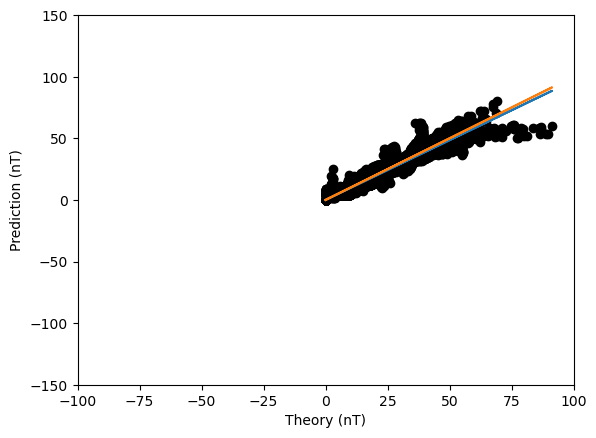

In [15]:
x = y_test.flatten()
y = test_pred.flatten()
m, b, r, p, st_er = stats.linregress(x,y) 

yfit = [b + m * xi for xi in x]
yisx = [0 + 1 * xi for xi in x]
plt.plot(x, yfit)
plt.plot(x, yisx)

plt.scatter(y_test, test_pred,  color='black')
plt.axis([-100,100, -150, 150])
plt.xlabel("Theory (nT)")
plt.ylabel("Prediction (nT)")
# plt.title("Neural Network Prediction vs Theory", fontsize=15)
# print(r, st_er)
print("r: {:.5f}, st_er: {:.6f}".format(r, st_er))
print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

In [16]:
test_pred

array([[-0.0586853 ],
       [-0.0586853 ],
       [-0.0586853 ],
       ...,
       [-0.0586853 ],
       [-0.05868673],
       [-0.05868673]], dtype=float32)

# Output data

In [ ]:
test_pred = model.predict(X1_pred)

In [ ]:
df_test

In [ ]:
df_test['predict'] = test_pred

In [ ]:
np.savetxt(img_path+"nn_32to38_erode_mae.txt", df_test[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")

In [ ]:
df_test

# Nonzero 32 to 38

In [91]:
X_train = X4_train
y_train = y4_train
X_test = X4_test
y_test = y4_test

In [48]:
shape = (len(X_train[0]),)
model = keras.Sequential()
model.add(Dense(4, activation='relu', input_shape=shape)) 
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='Adam', loss='mse', metrics=["accuracy"])

In [49]:
history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=[X_test, y_test])

Epoch 1/300
21693/21693 [==============================] - 45s 2ms/step - loss: 112.1294 - accuracy: 4.0336e-05 - val_loss: 98.5868 - val_accuracy: 0.0000e+00
Epoch 2/300
21693/21693 [==============================] - 30s 1ms/step - loss: 105.2662 - accuracy: 0.0000e+00 - val_loss: 98.5337 - val_accuracy: 0.0000e+00
Epoch 3/300
21693/21693 [==============================] - 26s 1ms/step - loss: 105.2663 - accuracy: 0.0000e+00 - val_loss: 98.5352 - val_accuracy: 0.0000e+00
Epoch 4/300
21693/21693 [==============================] - 27s 1ms/step - loss: 105.2645 - accuracy: 0.0000e+00 - val_loss: 98.5889 - val_accuracy: 0.0000e+00
Epoch 5/300
21693/21693 [==============================] - 25s 1ms/step - loss: 105.2662 - accuracy: 0.0000e+00 - val_loss: 98.5718 - val_accuracy: 0.0000e+00
Epoch 6/300
21693/21693 [==============================] - 27s 1ms/step - loss: 105.2669 - accuracy: 0.0000e+00 - val_loss: 98.5324 - val_accuracy: 0.0000e+00
Epoch 7/300
21693/21693 [=====================

21693/21693 [==============================] - 28s 1ms/step - loss: 105.2665 - accuracy: 0.0000e+00 - val_loss: 98.5524 - val_accuracy: 0.0000e+00
Epoch 104/300
21693/21693 [==============================] - 28s 1ms/step - loss: 105.2666 - accuracy: 0.0000e+00 - val_loss: 98.5400 - val_accuracy: 0.0000e+00
Epoch 105/300
21693/21693 [==============================] - 29s 1ms/step - loss: 105.2668 - accuracy: 0.0000e+00 - val_loss: 98.5459 - val_accuracy: 0.0000e+00
Epoch 106/300
21693/21693 [==============================] - 27s 1ms/step - loss: 105.2656 - accuracy: 0.0000e+00 - val_loss: 98.5536 - val_accuracy: 0.0000e+00
Epoch 107/300
21693/21693 [==============================] - 28s 1ms/step - loss: 105.2654 - accuracy: 0.0000e+00 - val_loss: 98.5853 - val_accuracy: 0.0000e+00
Epoch 108/300
21693/21693 [==============================] - 27s 1ms/step - loss: 105.2651 - accuracy: 0.0000e+00 - val_loss: 98.6003 - val_accuracy: 0.0000e+00
Epoch 109/300
21693/21693 [=====================

Epoch 154/300
21693/21693 [==============================] - 25s 1ms/step - loss: 105.2673 - accuracy: 0.0000e+00 - val_loss: 98.5320 - val_accuracy: 0.0000e+00
Epoch 155/300
21693/21693 [==============================] - 24s 1ms/step - loss: 105.2686 - accuracy: 0.0000e+00 - val_loss: 98.5512 - val_accuracy: 0.0000e+00
Epoch 156/300
21693/21693 [==============================] - 25s 1ms/step - loss: 105.2659 - accuracy: 0.0000e+00 - val_loss: 98.5608 - val_accuracy: 0.0000e+00
Epoch 157/300
21693/21693 [==============================] - 28s 1ms/step - loss: 105.2666 - accuracy: 0.0000e+00 - val_loss: 98.5699 - val_accuracy: 0.0000e+00
Epoch 158/300
21693/21693 [==============================] - 28s 1ms/step - loss: 105.2674 - accuracy: 0.0000e+00 - val_loss: 98.5700 - val_accuracy: 0.0000e+00
Epoch 159/300
21693/21693 [==============================] - 26s 1ms/step - loss: 105.2677 - accuracy: 0.0000e+00 - val_loss: 98.5327 - val_accuracy: 0.0000e+00
Epoch 160/300
21693/21693 [=======

Epoch 205/300
21693/21693 [==============================] - 24s 1ms/step - loss: 105.2651 - accuracy: 0.0000e+00 - val_loss: 98.5344 - val_accuracy: 0.0000e+00
Epoch 206/300
21693/21693 [==============================] - 24s 1ms/step - loss: 105.2686 - accuracy: 0.0000e+00 - val_loss: 98.5787 - val_accuracy: 0.0000e+00
Epoch 207/300
21693/21693 [==============================] - 25s 1ms/step - loss: 105.2665 - accuracy: 0.0000e+00 - val_loss: 98.5801 - val_accuracy: 0.0000e+00
Epoch 208/300
21693/21693 [==============================] - 26s 1ms/step - loss: 105.2670 - accuracy: 0.0000e+00 - val_loss: 98.5530 - val_accuracy: 0.0000e+00
Epoch 209/300
21693/21693 [==============================] - 27s 1ms/step - loss: 105.2655 - accuracy: 0.0000e+00 - val_loss: 98.5229 - val_accuracy: 0.0000e+00
Epoch 210/300
21693/21693 [==============================] - 27s 1ms/step - loss: 105.2670 - accuracy: 0.0000e+00 - val_loss: 98.5295 - val_accuracy: 0.0000e+00
Epoch 211/300
21693/21693 [=======

Epoch 256/300
21693/21693 [==============================] - 24s 1ms/step - loss: 105.2665 - accuracy: 0.0000e+00 - val_loss: 98.5671 - val_accuracy: 0.0000e+00
Epoch 257/300
21693/21693 [==============================] - 24s 1ms/step - loss: 105.2668 - accuracy: 0.0000e+00 - val_loss: 98.5239 - val_accuracy: 0.0000e+00
Epoch 258/300
21693/21693 [==============================] - 24s 1ms/step - loss: 105.2660 - accuracy: 0.0000e+00 - val_loss: 98.5895 - val_accuracy: 0.0000e+00
Epoch 259/300
21693/21693 [==============================] - 25s 1ms/step - loss: 105.2652 - accuracy: 0.0000e+00 - val_loss: 98.5468 - val_accuracy: 0.0000e+00
Epoch 260/300
21693/21693 [==============================] - 26s 1ms/step - loss: 105.2670 - accuracy: 0.0000e+00 - val_loss: 98.5621 - val_accuracy: 0.0000e+00
Epoch 261/300
21693/21693 [==============================] - 27s 1ms/step - loss: 105.2658 - accuracy: 0.0000e+00 - val_loss: 98.5401 - val_accuracy: 0.0000e+00
Epoch 262/300
21693/21693 [=======

In [92]:
train_pred = model.predict(X_train)
print(mse(train_pred, y_train))
print(mae(train_pred, y_train))
print(mape(train_pred, y_train))
test_pred = model.predict(X_test)
print(mse(test_pred, y_test))
print(mae(test_pred, y_test))
print(mape(test_pred, y_test))

21693/21693 [==============================] - 21s 971us/step
23.86287321177594
2.678981265428878
0.28349644939505547
847/847 [==============================] - 1s 1ms/step
16.717735373398167
2.4307068751180214
0.25293886363821316


In [93]:
model.evaluate(X_test, y_test)

847/847 [==============================] - 1s 1ms/step - loss: 16.7177 - accuracy: 0.0000e+00


[16.717744827270508, 0.0]

In [75]:
np.corrcoef(test_pred.flatten(), y_test)

/Users/chikakoolsen/opt/anaconda3/envs/tf/lib/python3.10/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/chikakoolsen/opt/anaconda3/envs/tf/lib/python3.10/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


array([[nan, nan],
       [nan,  1.]])

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 4)                 24        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dense_8 (Dense)             (None, 4)                 20        
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [54]:
history.history

{'loss': [112.1294174194336,
  105.26622009277344,
  105.26628875732422,
  105.2645034790039,
  105.26624298095703,
  105.26690673828125,
  105.26874542236328,
  105.26560974121094,
  105.26678466796875,
  105.2658462524414,
  105.26538848876953,
  105.26734924316406,
  105.26690673828125,
  105.26556396484375,
  105.26435089111328,
  105.26583862304688,
  105.26805877685547,
  105.26732635498047,
  105.26676177978516,
  105.26579284667969,
  105.26529693603516,
  105.2652359008789,
  105.26692199707031,
  105.26362609863281,
  105.26597595214844,
  105.26651763916016,
  105.26626586914062,
  105.26627349853516,
  105.26656341552734,
  105.2669906616211,
  105.26658630371094,
  105.26683044433594,
  105.2661361694336,
  105.26748657226562,
  105.26716613769531,
  105.26439666748047,
  105.26638793945312,
  105.26728057861328,
  105.26728057861328,
  105.26667022705078,
  105.26593780517578,
  105.26653289794922,
  105.26710510253906,
  105.2669906616211,
  105.26730346679688,
  105.266

In [55]:
file = model_path+'model_nonzero_32to38_5layer4unit_erode_adam.sav'
pickle.dump(model, open(file, 'wb'))

INFO:tensorflow:Assets written to: ram:///var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/tmpl2tdtb55/assets


In [ ]:
model.save(model_path)

In [94]:
file = model_path+'model_nonzero_32to38_5layer4unit_erode.sav'
model = pickle.load(open(file, 'rb'))
result = model.evaluate(X_test, y_test)
print(result)

847/847 [==============================] - 1s 1ms/step - loss: 16.7177 - accuracy: 0.0000e+00
[16.717744827270508, 0.0]


## Plot

### Loss function (MSE)

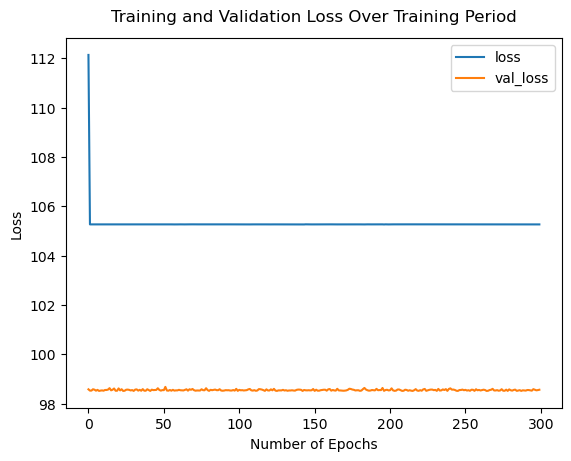

In [56]:
model_df = pd.DataFrame(history.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

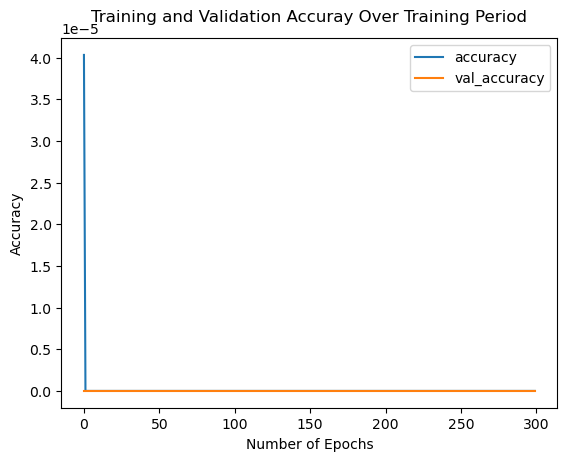

In [57]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

### Theory vs Predict

r: 0.00000, st_er: 0.000000
y = 0.0*x + 11.6158


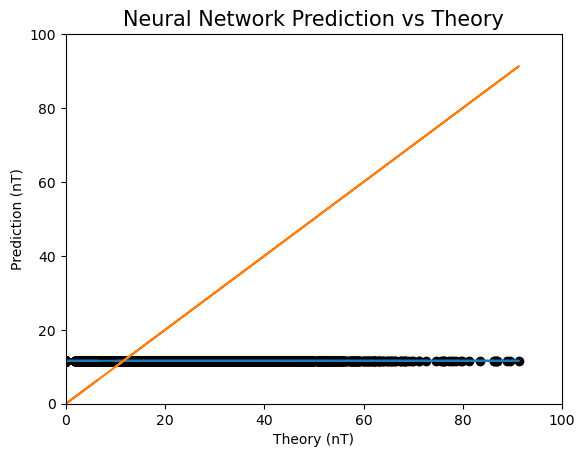

In [58]:
x = y_test.flatten()
y = test_pred.flatten()
m, b, r, p, st_er = stats.linregress(x,y) 

yfit = [b + m * xi for xi in x]
yisx = [0 + 1 * xi for xi in x]
plt.plot(x, yfit)
plt.plot(x, yisx)

plt.scatter(y_test, test_pred,  color='black')
plt.axis([0,100, 0, 100])
plt.xlabel("Theory (nT)")
plt.ylabel("Prediction (nT)")
plt.title("Neural Network Prediction vs Theory", fontsize=15)
# print(r, st_er)
print("r: {:.5f}, st_er: {:.6f}".format(r, st_er))
print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

# Output data

In [59]:
test_pred = model.predict(X4_pred)

847/847 [==============================] - 1s 847us/step


In [60]:
df4_pred['predict'] = test_pred

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_8685/2364276288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_pred['predict'] = test_pred


In [61]:
df4_pred

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory,predict
936040,36,6,8,33,40,-281.228516,-281.580200,-298.687897,-313.737274,-312.011200,6.323732,11.6158
936041,36,6,8,33,41,-470.337860,-472.075500,-488.780823,-502.790314,-501.399567,5.692159,11.6158
936042,36,6,8,33,42,-681.214478,-683.935608,-700.522400,-713.198364,-711.765076,5.156662,11.6158
936043,36,6,8,33,43,-892.559753,-896.184509,-911.637207,-924.472595,-923.017944,4.694756,11.6158
936079,36,6,8,34,15,-1471.209351,-1475.378540,-1489.757202,-1499.828979,-1503.126099,3.883065,11.6158
...,...,...,...,...,...,...,...,...,...,...,...,...
1046804,36,6,35,36,20,-610.252991,-613.019775,-628.576294,-640.380493,-640.784180,6.022675,11.6158
1046805,36,6,35,36,21,-460.002319,-461.472900,-478.441254,-491.319244,-490.660767,6.719324,11.6158
1046806,36,6,35,36,22,-321.722260,-321.674591,-340.263275,-354.678894,-352.521301,7.573551,11.6158
1046807,36,6,35,36,23,-196.516602,-195.509140,-214.553329,-230.615768,-227.110611,8.658540,11.6158


In [62]:
df_test

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory
901120,36,6,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
901121,36,6,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
901122,36,6,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0
901123,36,6,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0
901124,36,6,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1081339,36,6,43,63,59,0.0,0.0,0.0,0.0,0.0,0.0
1081340,36,6,43,63,60,0.0,0.0,0.0,0.0,0.0,0.0
1081341,36,6,43,63,61,0.0,0.0,0.0,0.0,0.0,0.0
1081342,36,6,43,63,62,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
df_test['predict'] = 0.00

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_8685/3257651465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict'] = 0.00


In [64]:
df_out = df_test[['i', 'j', 'k', 'predict']]
df_pre = df4_pred[['i', 'j', 'k', 'predict']]

In [65]:
for x in range(len(df_pre)):
    i = df_pre.iloc[x, :]['i'].astype(int)
    j = df_pre.iloc[x, :]['j'].astype(int)
    k = df_pre.iloc[x, :]['k'].astype(int)
    pred = df_pre.iloc[x, :]['predict']
    idx = df_out[(df_out['i']==i) & (df_out['j']==j) & (df_out['k']==k)].index
    df_out.loc[idx, 'predict']= pred

In [66]:
df_out[(df_out['i']==7) & (df_out['j']==32) & (df_out['k']==40)]

,i,j,k,predict
931880,7,32,40,0.0


In [67]:
np.savetxt(img_path+"nn_nonzero_32to38_5layer4unit_erode_adam.txt", df_out[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")